In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from gaussian_process_regression_utils import get_posterior_mean_cov

In [2]:
df = pd.read_csv("weight_data.tsv", sep="\t")

In [3]:
#df = df.sample(10)

In [4]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,weight,before_breakfast,after_toilet
0,2021-01-17,94.0,False,False
1,2021-01-24,95.0,False,False
2,2021-01-31,95.3,False,False
3,2021-02-07,94.8,False,False
4,2021-02-14,95.9,False,False


In [5]:
df["day"] = (df.date - df.date.min()).dt.days
df.head()

,date,weight,before_breakfast,after_toilet,day
0,2021-01-17,94.0,False,False,0
1,2021-01-24,95.0,False,False,7
2,2021-01-31,95.3,False,False,14
3,2021-02-07,94.8,False,False,21
4,2021-02-14,95.9,False,False,28


<AxesSubplot:xlabel='date', ylabel='weight'>

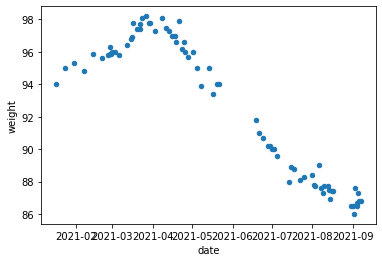

In [6]:
df.plot(x="date", y="weight", kind="scatter")

In [7]:
def ornstein_uhlenbeck_covariance_function(alpha, sigma):
    s2 = sigma**2 / (1-alpha)
    def cov_fun(t0, t1):
        return alpha ** np.abs(t1 - t0) * s2
    
    return cov_fun

In [8]:
def squared_quadratic_covaiance_function(length, c):
    def cov_fun(t0, t1):
        return c * np.exp(- 1/2 * ((t1 - t0) / length)**2) 
    
    return cov_fun
    

In [9]:
cov_fun = ornstein_uhlenbeck_covariance_function(alpha=1 - 1/10000, sigma=0.1)

In [10]:
cov_fun = squared_quadratic_covaiance_function(length=30, c=100)

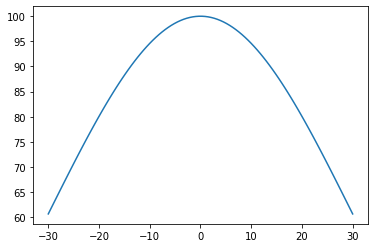

In [11]:
xxx = np.linspace(-30, 30, 100)
plt.plot(xxx, cov_fun(xxx, 0))

In [12]:
# variation of one measurement "observation variance"
obs_var = 0.5

# lon
mean_weight = 87

Denote by $x_1$ the observed times, $y_1$ the weight measurements, $f_1$ the real weights at the times $x_1$ and similarly $x_2, f_2$ the unobserved times and ideal weights.

In [13]:
x1 = np.array(df.day)
y1 = np.array(df.weight)
x2 = np.linspace(df.day.max(), df.day.min(), 100)

In [15]:
f2_mean, f2_cov = get_posterior_mean_cov(
    prior_mean=mean_weight, prior_cov_fun=cov_fun, obs_var=obs_var,
    x1=x1, y1=y1, x2=x2
)

In [16]:
f2_cov.diagonal()

array([0.13248309, 0.06366268, 0.05647977, 0.0753415 , 0.09762214,
       0.1115622 , 0.11351971, 0.10507212, 0.09038776, 0.07415556,
       0.06021258, 0.05086748, 0.046809  , 0.04742219, 0.05131452,
       0.05687151, 0.06270591, 0.06792183, 0.07217351, 0.07554879,
       0.07834268, 0.08080518, 0.08294638, 0.08446383, 0.08482308,
       0.08347975, 0.0801876 , 0.07530314, 0.06998351, 0.06618802,
       0.06643517, 0.07332966, 0.08894296, 0.11418641, 0.14834108,
       0.18888961, 0.23173478, 0.27179786, 0.30389134, 0.32368259,
       0.3285304 , 0.31799764, 0.29391694, 0.25999373, 0.22104284,
       0.18204153, 0.14721934, 0.11938526, 0.09962284, 0.08738542,
       0.08092422, 0.07790958, 0.07607465, 0.07372779, 0.07003282,
       0.06502752, 0.05941957, 0.05424697, 0.05050908, 0.04886423,
       0.04945802, 0.05190582, 0.05541329, 0.05899   , 0.06169624,
       0.06286295, 0.06223556, 0.06001272, 0.05677435, 0.05331858,
       0.05044809, 0.04875952, 0.04849145, 0.04947402, 0.05119

<ErrorbarContainer object of 3 artists>

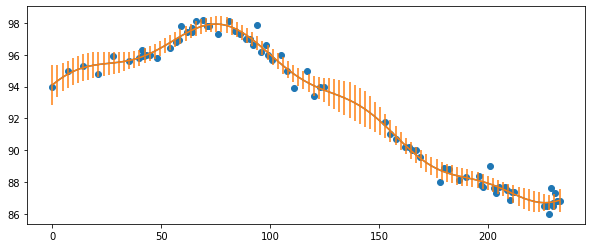

In [17]:
plt.figure(figsize=[10, 4])
plt.scatter(x1, y1)
plt.plot(x2, f2_mean)
plt.errorbar(x=x2, y=f2_mean, yerr=2*np.sqrt(f2_cov.diagonal()))
